# Decompose HSC observed QSO image

This notebook requires standard python libraries and the publicly available packages on github:
See https://github.com/dartoon/galight/blob/master/requirements.txt

This notebook has been tested with galight == 0.1.7

For more information, please contact me: dingxuheng@126.com

This notebook is very similar to the 'galight_HST_QSO.ipynb', only that the noise_map, PSF are input to the fittings. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: https://drive.google.com/file/d/1ZO9-HzV8K60ijYWK98jGoSoZHjIGW5Lc/view?usp=sharing
fitsFile = pyfits.open('../example_files/HSC/QSO/000017.88+002612.6_HSC-I.fits')

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

#Derive the fov noise level map:
err_data= fitsFile[3].data ** 0.5

#Calculate the zeropoint for HSC filters:
file_header0 = fitsFile[0].header
FLUXMAG0 = file_header0['FLUXMAG0']
zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.

#Load the PSF data:
PSF = pyfits.getdata('../example_files/HSC/QSO/000017.88+002612.6_HSC-I_psf.fits')

Estimating the background light ... ... ...
Plot target cut out zoom in:


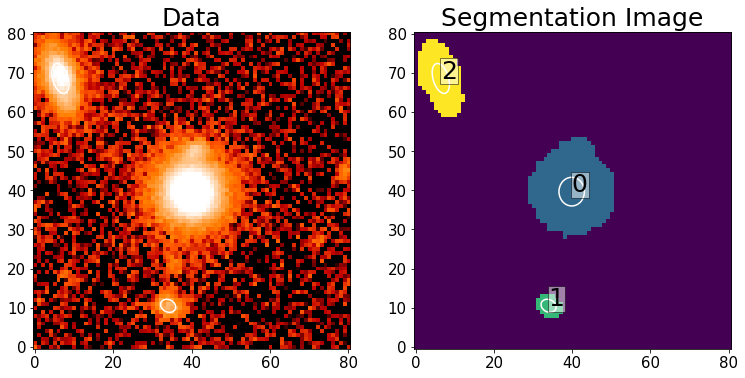

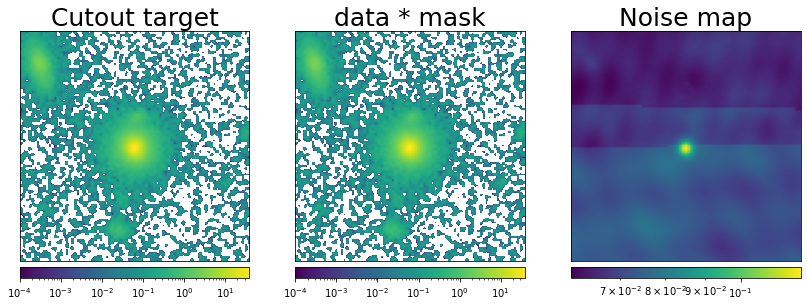

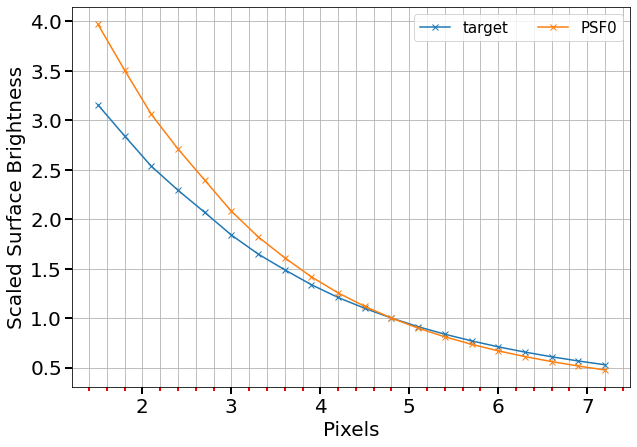

The PSF is not a box size, will cut it to a box size automatically.
The data_process is ready to go to pass to FittingSpecify!


In [2]:
from galight.data_process import DataProcess

#RA, DEC information of the QSO:
QSO_RA, QSO_DEC = 0.07452999800443649, 0.4368380010128021
data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [QSO_RA, QSO_DEC],
                           pos_type = 'wcs', header = header,
                          rm_bkglight = True, if_plot=False, zp = zp)

#Generate the fitting materials
data_process.generate_target_materials(radius=None, create_mask = False, nsigma=2.8, #if_select_obj=True,
                                      exp_sz= 1.5, npixels = 15, if_plot=True)

#Manually input the PSF:
data_process.PSF_list = [PSF]

# Compare the 1D profile of all the components.
data_process.profiles_compare(norm_pix = 5, if_annuli=False, y_log = False,
                  prf_name_list = (['target'] + ['PSF{0}'.format(i) for i in range(len(data_process.PSF_list))]) )


#Check if all the materials is given, if so to pass to the next step.
data_process.checkout() #Check if all the materials is known.

The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


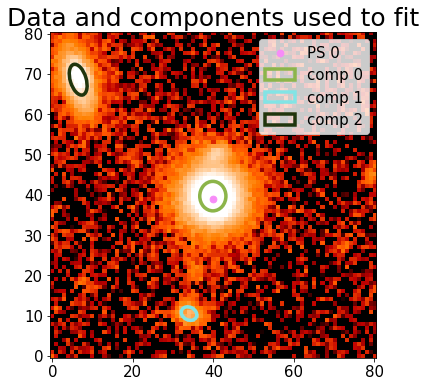

In [3]:
#Start to produce the class and params for lens fitting.
#For more details, see notebook galight_HST_QSO.ipynb
from galight.fitting_specify import FittingSpecify
fit_sepc = FittingSpecify(data_process)
fit_sepc.prepare_fitting_seq(point_source_num = 1)
#Using following line: want to fix Sersic_n as 4 for the source_id = 0, and if want to fix the QSO and host center:
# fit_sepc.prepare_fitting_seq(point_source_num = 1, fix_n_list= [[0,4]], fix_center_list = [[0,0]])

#Plot the initial settings for fittings. 
fit_sepc.plot_fitting_sets()

fit_sepc.build_fitting_seq()

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-1.4358420846774789 reduced X^2 of best position
-4693.04985376834 logL
6537.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 0.8561596556706174, 'n_sersic': 1.6304372157790232, 'e1': -0.050292474216709245, 'e2': 0.05833910961243422, 'center_x': 0.04933435433310334, 'center_y': -0.08003955790067059}, {'amp': 1, 'R_sersic': 0.5251987081088259, 'n_sersic': 3.347256920781214, 'e1': 0.03702739747646502, 'e2': 0.18402073798293836, 'center_x': 0.9912922952422903, 'center_y': -4.927719569478859}, {'amp': 1, 'R_sersic': 1.0732754936749755, 'n_sersic': 2.4730625827613832, 'e1': -0.45672922822283646, 'e2': 0.28455554863586074, 'center_x': 5.645775105746496, 'center_y': 4.863099913254272}] lens light result
[{'ra_image': array([0.02197801]), 'dec_image': array([-0.11692701]), 'point_amp': array([1.])}] point source result
{} special param result
14.092708110809326 time used for  PSO


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 130/130 [09:04<00:00,  4.19s/it]


Computing the MCMC...
Number of walkers =  200
Burn-in iterations:  100
Sampling iterations (in current run): 130
545.7868061065674 time taken for MCMC sampling
560.372 total time taken for the overall fitting (s)
============ CONGRATULATION, YOUR JOB WAS SUCCESSFUL ================ 
Start transfering the Params to fluxs...
6000 MCMC samplers in total, finished translate: 1000
6000 MCMC samplers in total, finished translate: 2000
6000 MCMC samplers in total, finished translate: 3000
6000 MCMC samplers in total, finished translate: 4000
6000 MCMC samplers in total, finished translate: 5000


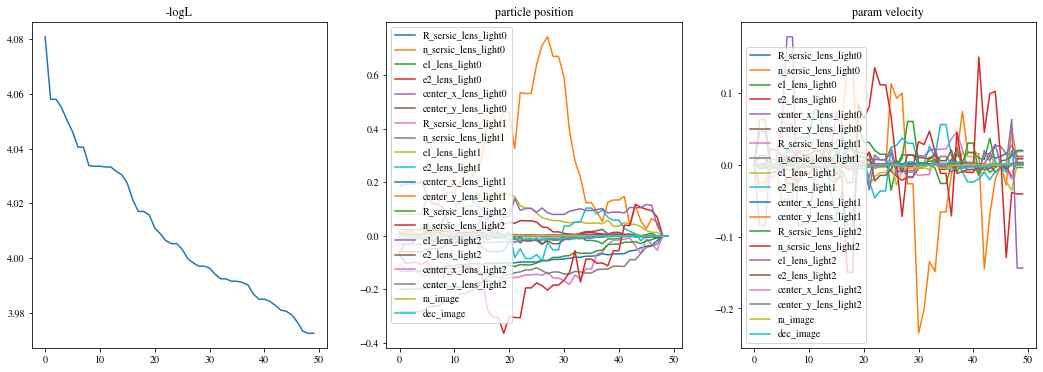

<Figure size 432x288 with 0 Axes>

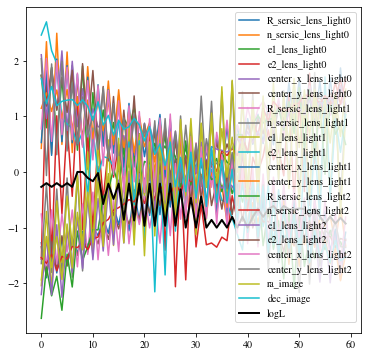

-1.413701060385374 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  1.413701060385374


/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:533: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data - model), origin='lower', vmin=v_min, vmax=v_max,


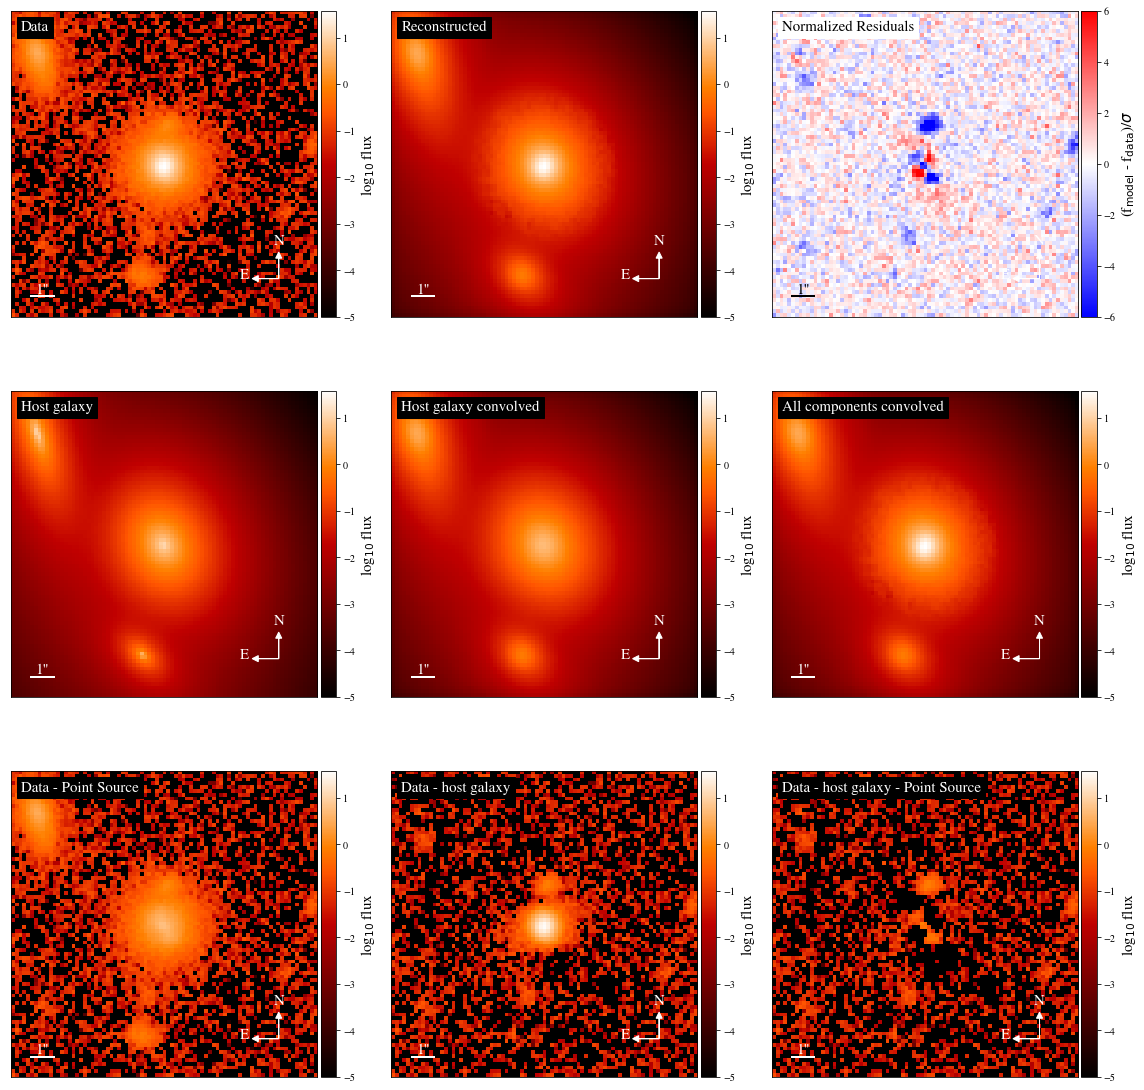

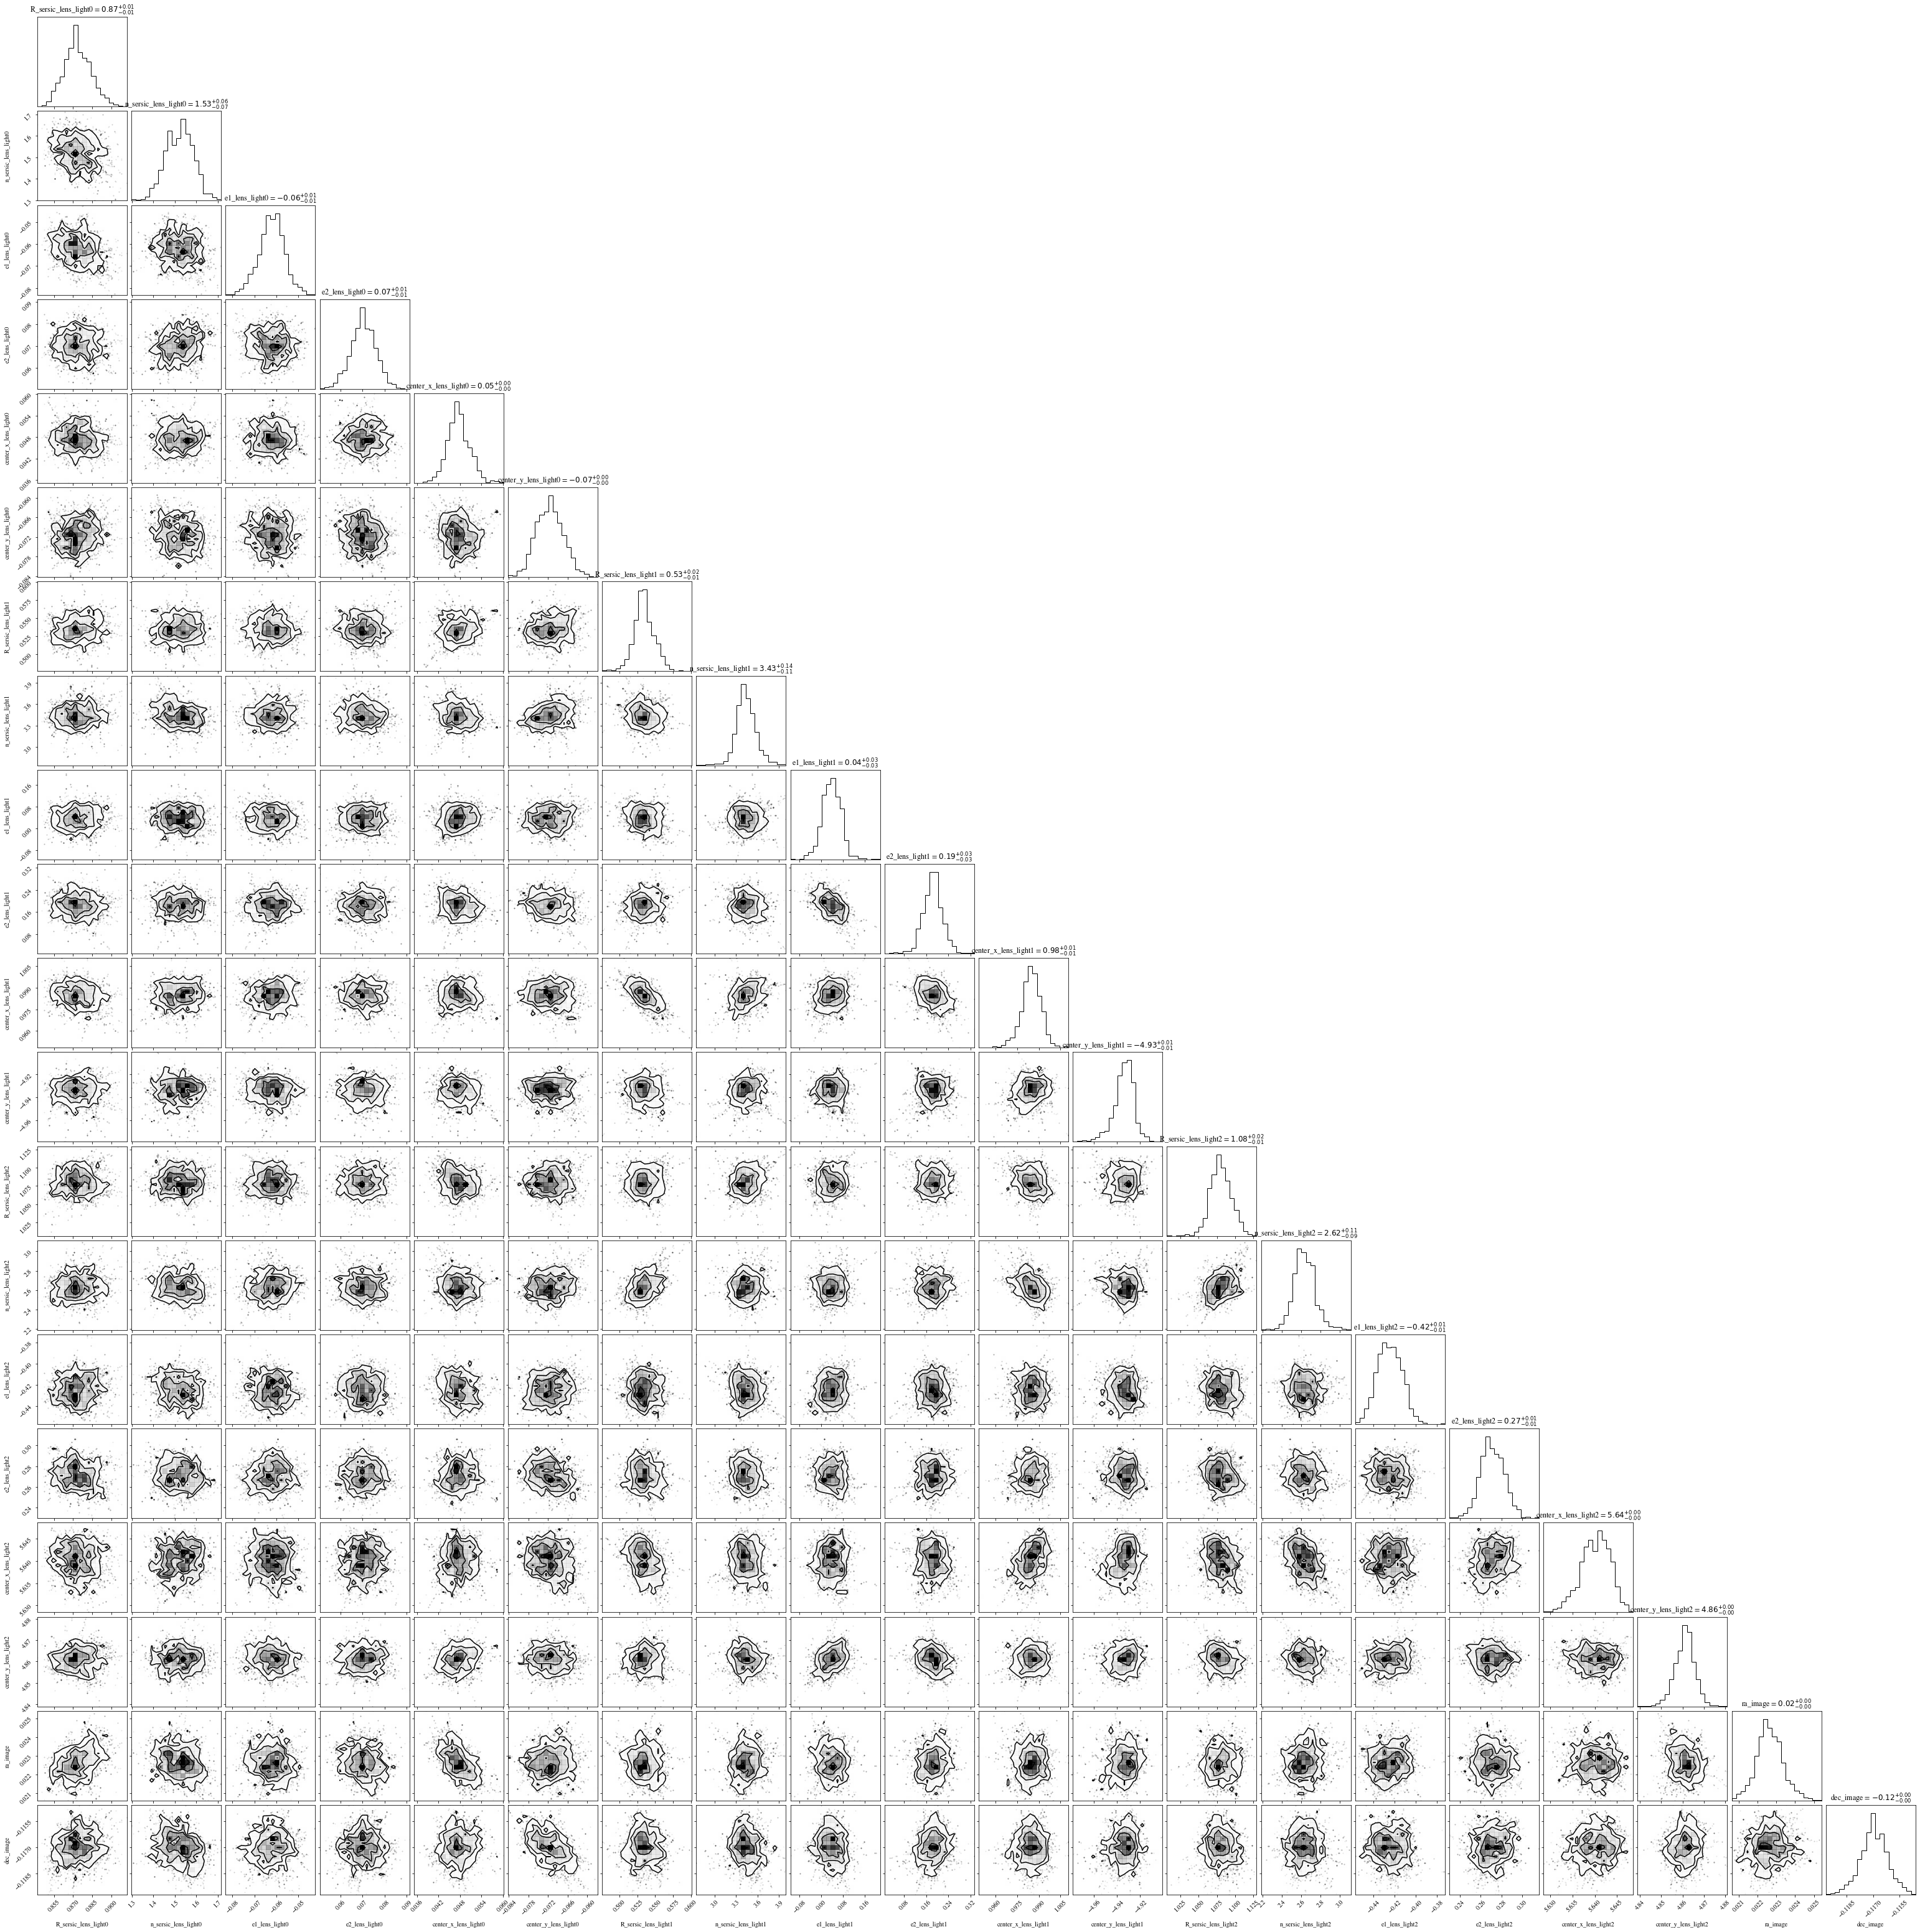

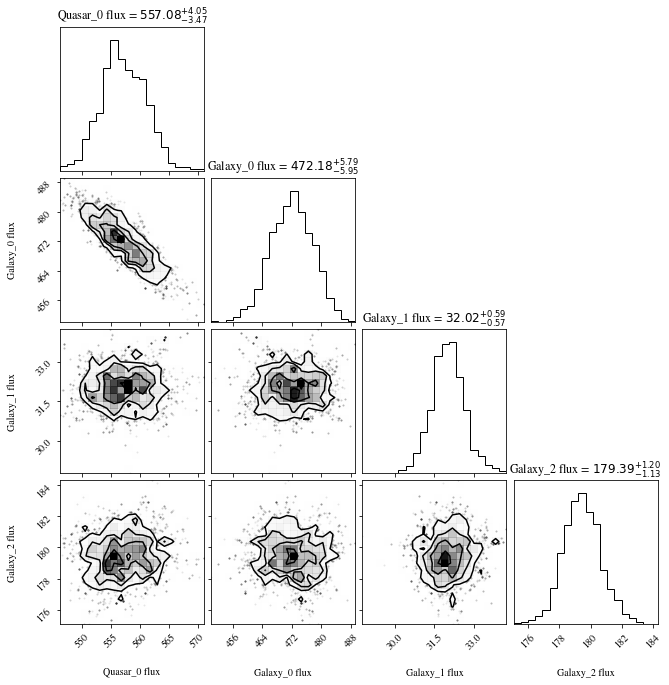

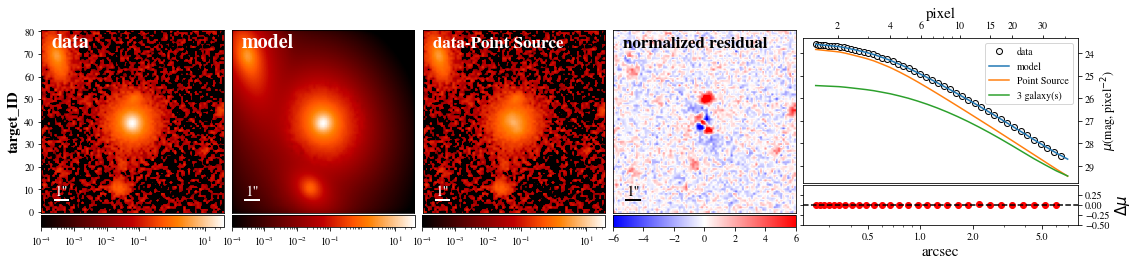

In [4]:
#Setting the fitting method and run.
from galight.fitting_process import FittingProcess

#Pass fit_sepc to FittingProcess,
# savename: The name of the saved files.    
fit_run = FittingProcess(fit_sepc, savename = 'HSC_result', fitting_level='shallow')
#For the fitting_level, you can also put ['shallow', 'deep'] for the later ['PSO', 'MCMC'] corresplingly.

#Setting the fitting approach and Run: 
#     algorithm_list: The fitting approaches that would be used: e.g. ['PSO', 'PSO', 'MCMC']
#     setting_list: The detailed setting for the fitting can be as follows.
#     -for PSO:
#         input template: {'sigma_scale': 0.8, 'n_particles': 50, 'n_iterations': 50}
#     -for MCMC:
#         input template: {'n_burn': 50, 'n_run': 100, 'walkerRatio': 10, 'sigma_scale': .1}
#     if setting_list = [None, None, None], default values would be given 
fit_run.run(algorithm_list = ['PSO', 'MCMC'], setting_list = [None, None]) 
#Try also setting_list = [{'sigma_scale': 0.8, 'n_particles': 50, 'n_iterations': 50}, {'n_burn': 50, 'n_run': 100, 'walkerRatio': 10, 'sigma_scale': .1}]

# Plot all the fitting results, including:
#         run_diag() : The convergence of the chains.
#         model_plot(): The model plot (by lenstronomy)
#         plot_params_corner(): The mcmc corner for all the chains (MCMC should be peformed) 
#         plot_flux_corner(): The flux corner for all the component (MCMC should be peformed)
#         plot_final_qso_fit() or plot_final_galaxy_fit(): Plot the overall plot (data, model, data-ps, resudal, 1D profile)
fit_run.plot_all()


#Save the fitting class as pickle format:
#     Note, if you use python3 (or 2), load with python3 (or 2)
fit_run.dump_result(savedata=False)  #You can set savedata= True to save the data_process_class, otherwise, it will be removed in pickle.

In [5]:
#Load the saved fitting class, the fitting_run_result would be the loaded as fit_run() in previous fittings.
import pickle
picklename = 'HSC_result.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))  #fitting_run_result is actually the fit_run in previous box.
#fitting_run_result.plot_final_qso_fit()
fitting_run_result.final_result_galaxy

[{'amp': 50.74043702789294,
  'R_sersic': 0.8911977689327896,
  'n_sersic': 1.5106851123884746,
  'e1': -0.07006169652271702,
  'e2': 0.07323425542225111,
  'center_x': 0.04276339424224773,
  'center_y': -0.06651680345776753,
  'phi_G': 1.167029100327479,
  'q': 0.815952538436694,
  'flux_sersic_model': 471.6316620539782,
  'flux_within_frame': 471.1030836515346,
  'magnitude': 20.317210132588123},
 {'amp': 8.67600701612711,
  'R_sersic': 0.5507448857054955,
  'n_sersic': 3.1253103723913,
  'e1': 0.003603059795660446,
  'e2': 0.20884880097635375,
  'center_x': 0.9683258030910995,
  'center_y': -4.941452843317253,
  'phi_G': 0.7767730183613861,
  'q': 0.6544240956482724,
  'flux_sersic_model': 34.67199289918764,
  'flux_within_frame': 32.213217308810684,
  'magnitude': 23.229914744168966},
 {'amp': 27.158755406199163,
  'R_sersic': 1.1084571765228572,
  'n_sersic': 2.793675582570573,
  'e1': -0.40938749095421556,
  'e2': 0.2599128614927771,
  'center_x': 5.635994764734405,
  'center_y':

### Galight can help you measure the asymetry of the target using the saved pickle file:

#### see also the following link for more details:
https://github.com/dartoon/galight_notebooks/blob/master/galight_measure_asymmetry_CAS.ipynb

Estimating the background light ... ... ...
Zeropoint value is not provided, use 27.0 to calculate magnitude.


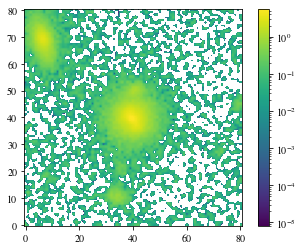

Measuring the position for minimized asy...
Optimization terminated successfully.
         Current function value: 66.539151
         Iterations: 99
         Function evaluations: 188
The pixel position that gives you the minimized asy: [-0.22460855 -0.42440052]
Plot the minimized abs residual:


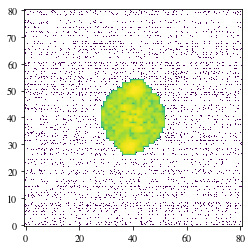

Plot the region to estiamte the background asymmetry:


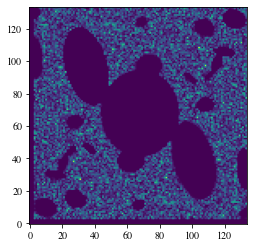

asymmetry : 0.07937097220006119


In [6]:
from galight.tools.asymmetry_tools import Measure_asy
from galight.tools.astro_tools import plt_fits
import pickle

picklename = 'HSC_result.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
if_remeasure_bkg = True

#By default, fit_run.dump_result() will removed the 'data_process_class' to save space. 
#However, the if_remeasure_bkg=True will extend the stamp size using data_process_class,
#so if you want to re-measure bkg, using the following to redefine data_process:
if if_remeasure_bkg == True and hasattr(fitting_run_result.fitting_specify_class, 'data_process_class') == False:
    import astropy.io.fits as pyfits
    from galight.data_process import DataProcess
    QSO_RA, QSO_DEC = 0.07452999800443649, 0.4368380010128021
    fitsFile = pyfits.open('../example_files/HSC/QSO/000017.88+002612.6_HSC-I.fits')
    fov_image = fitsFile[1].data # check the back grounp
    header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']
    err_data= fitsFile[3].data ** 0.5
    data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [QSO_RA, QSO_DEC],
                               pos_type = 'wcs', header = header,
                              rm_bkglight = True, if_plot=False, zp = None)
    fitting_run_result.fitting_specify_class.data_process_class = data_process

asy_class = Measure_asy(fitting_run_result, seg_cal_reg = 'or', obj_id=0)  
#in last line, seg_cal_reg='or' means the segm map will be extended. Try also 'and'.
asy_class.img -= asy_class.fitting_process_class.image_ps_list[0]  #Point source will be removed first.

plt_fits(asy_class.img,colorbar=True)
asy_class.asy_segm(mask_type='segm')  #Try also mask_type='aper'
pos = asy_class.find_pos()
print('The pixel position that gives you the minimized asy:', pos["x"])
asy_class.make_bkg(rotate_pix = pos["x"], if_remeasure_bkg=if_remeasure_bkg)
asy = asy_class.cal_asymmetry(rotate_pix = pos["x"],
                              if_plot=True, if_plot_bkg=True)
print('asymmetry :', asy)